# Santander Value Prediction Challenge
### Predict the value of transactions for potential customers. [Banco Santander | kaggle](https://www.kaggle.com/competitions/santander-value-prediction-challenge/leaderboard)
==================================================================================================

![logo santander](../utils/Santander-Logo.png)

In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

For every row in the _test.csv_, submission files should contain two columns: ID and target.  The ID corresponds to the column of that ID in the _test.tsv_. 

In [1]:
# We load the needed libraries

# Tratamiento de datos
# ================================================================================================================
import os
import numpy as np
import pandas as pd

# Gráficos
# ================================================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')


# Modeling and processing
# ================================================================================================================

# Linerar Regression
# ====================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Multi-layer Perceptron Regressor
# ====================================================
from sklearn.neural_network import MLPRegressor

# Decision Tree Regressor
# ====================================================
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor
# ====================================================
from sklearn.ensemble import RandomForestRegressor

# Support Vector Regressor
# ====================================================
from sklearn.svm import SVR

# Bagging Regressor
# ====================================================
from sklearn.ensemble import BaggingRegressor

# AdaBoost Regressor
# ====================================================
from sklearn.ensemble import AdaBoostRegressor

# Gradient Boosting Regressor
# ====================================================
from sklearn.ensemble import GradientBoostingRegressor

# K Neighbors Regressor
# ====================================================
from sklearn.neighbors import KNeighborsRegressor

# Model evaluation
# ================================================================================================================
from sklearn.metrics import mean_squared_error

# Warnings configuration
# ================================================================================================================
import warnings
warnings.filterwarnings('ignore')

# Define the model
==================================================================================================

We need a __regression__ model, and we count on __supervised__ bivariated data.

In [11]:
# We set our current directories
NOTEBOOK_DIRECTORY_PATH = os.getcwd()
ROOT_PATH = os.path.dirname(NOTEBOOK_DIRECTORY_PATH)

# Charge data
data = np.load(ROOT_PATH + '/data/data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

### A) Linear Regression

A simple Linear Regression does overfit the model. The difference between the results in training and in test diverge significantly. One cause might be that, for linear regression to work, we need to ensure that the relationship between the features and the target variable is linear. If it isn't, linear regression won't give us good predictions.

Furhter computational resources are needed to regularize through Lasso or Ridge regression, and for polynomial regression.

In [4]:
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1) 

#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
def model_evaluation(y_train, y_pred_train, y_test, y_pred_test):
    print('RMSE in train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('RMSE in test:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print('\t')
    print('--'*40)
    fig, ax =plt.subplots(1,2)
    sns.regplot(y_train, y_pred_train, ax=ax[0]).set(title='Train', xlabel = "y real", ylabel = "y predicted")
    sns.regplot(y_test, y_pred_test, ax=ax[1]).set(title='Test', xlabel = "y real", ylabel = "y predicted")
    fig.suptitle('Distribution of predictions')
    fig.set_figheight(6)
    fig.set_figwidth(10)
    plt.show();
    print('--'*40)

RMSE in train: 225789.28970113446
RMSE in test: 2503103121794090.5
	
--------------------------------------------------------------------------------


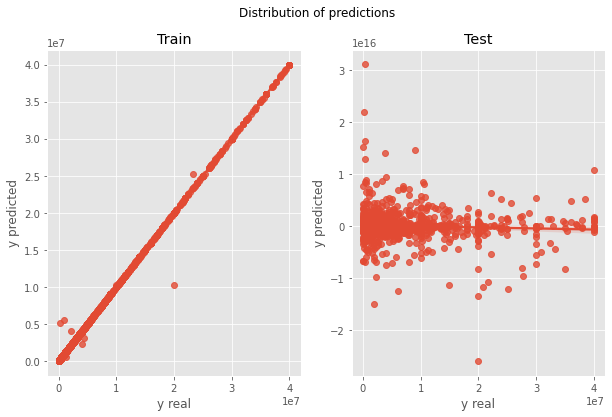

--------------------------------------------------------------------------------


In [107]:
# Model evaluation

model_evaluation(y_train, lm.predict(X_train), y_test, lm.predict(X_test))

### B) Multi-layer Perceptron regressor

In [6]:
#Training the Data Model

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

RMSE in train: 2636842.8582702535
RMSE in test: 12674516.09170774
	
--------------------------------------------------------------------------------


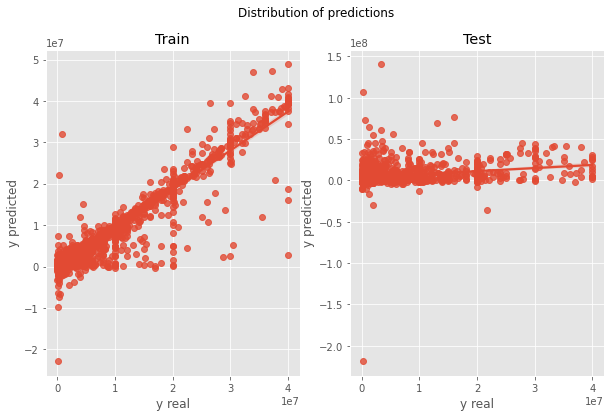

--------------------------------------------------------------------------------


In [115]:
# Model evaluation

model_evaluation(y_train, regr.predict(X_train), y_test, regr.predict(X_test))

### C) Decision Tree Regressor


In [12]:
tree_clf = DecisionTreeRegressor(max_depth=2,
                                  random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

RMSE in train: 7588380.393332222
RMSE in test: 7429421.250925168
	
--------------------------------------------------------------------------------


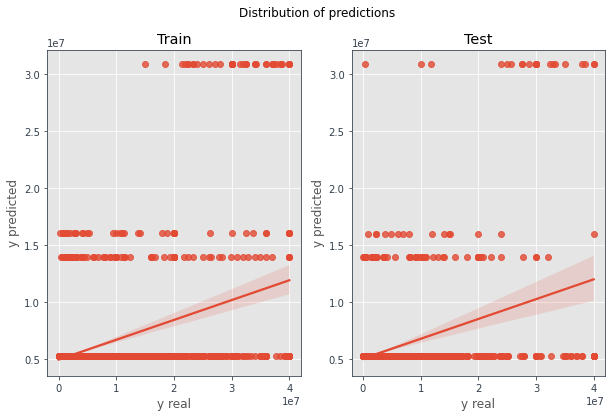

--------------------------------------------------------------------------------


In [46]:
# Model evaluation

model_evaluation(y_train, tree_clf.predict(X_train), y_test, tree_clf.predict(X_test))

### D) Random forest regressor

In [18]:
rfc = RandomForestRegressor(max_depth=12)
rfc.fit(X_train, y_train)


RandomForestRegressor(max_depth=12)

RMSE in train: 6122286.726336138
RMSE in test: 7132920.357019588
	
--------------------------------------------------------------------------------


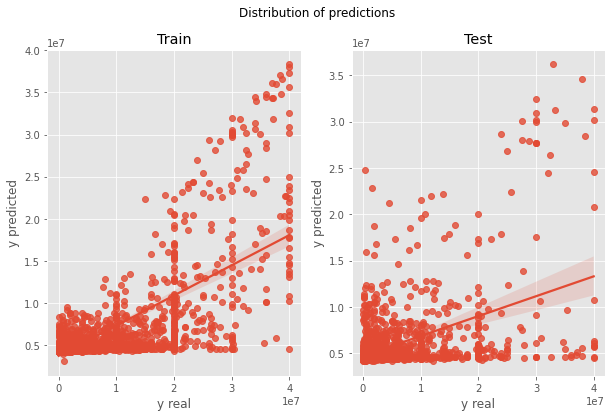

--------------------------------------------------------------------------------


In [32]:
# Model evaluation

model_evaluation(y_train, rfc.predict(X_train), y_test, rfc.predict(X_test))

### E) Support Vector Regressor

In [93]:
svc = SVR(kernel = 'rbf')

svc.fit(X_train, y_train)


SVR()

RMSE in train: 9171406.640142838
RMSE in test: 8770300.97023953
	
--------------------------------------------------------------------------------


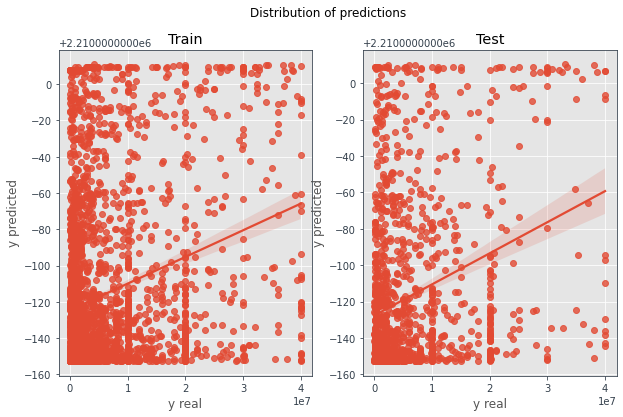

--------------------------------------------------------------------------------


In [94]:
# Model evaluation

model_evaluation(y_train, svc.predict(X_train), y_test, svc.predict(X_test))

### F) Bagging Regressor

In this case, we get better results using as base estimator the DecisionTreeRegressor against the SVR.

In [101]:
bagging_tree = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0).fit(X_train, y_train)

RMSE in train: 3291974.680936726
RMSE in test: 7408519.944048858
	
--------------------------------------------------------------------------------


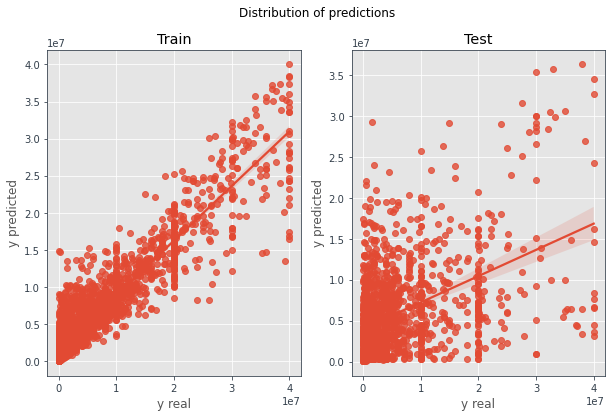

--------------------------------------------------------------------------------


In [102]:
# Model evaluation

model_evaluation(y_train, bagging_tree.predict(X_train), y_test, bagging_tree.predict(X_test))

### G) AdaBoost Regressor

In [106]:
ada = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train, y_train)

RMSE in train: 11572857.142085722
RMSE in test: 11822454.539715538
	
--------------------------------------------------------------------------------


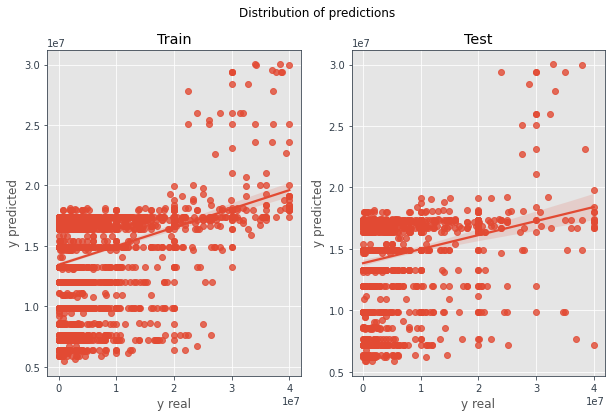

--------------------------------------------------------------------------------


In [107]:
# Model evaluation

model_evaluation(y_train, ada.predict(X_train), y_test, ada.predict(X_test))

### H) Gradient Boosting Regressor

In [111]:
gr_boost = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

RMSE in train: 5773641.64694688
RMSE in test: 7229499.672587209
	
--------------------------------------------------------------------------------


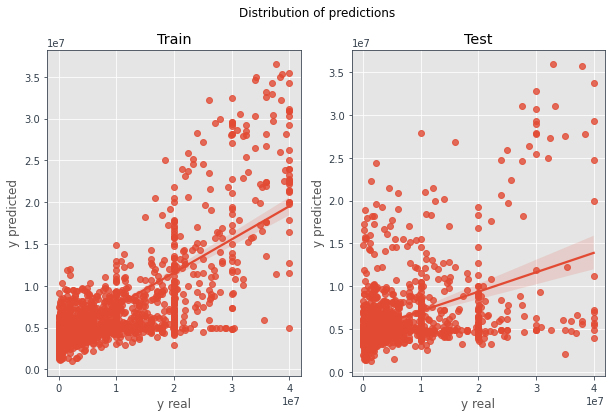

--------------------------------------------------------------------------------


In [112]:
# Model evaluation

model_evaluation(y_train, gr_boost.predict(X_train), y_test, gr_boost.predict(X_test))

### I) K Nearest Neighbors Regressor

RMSE in train: 7651631.816860286
RMSE in test: 8017857.2116148705
	
--------------------------------------------------------------------------------


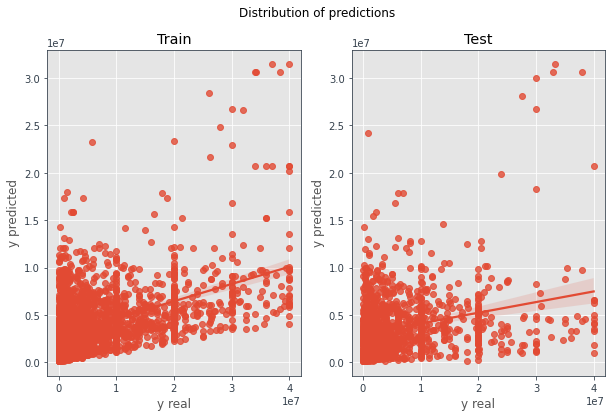

--------------------------------------------------------------------------------


In [123]:
neigh = KNeighborsRegressor(n_neighbors=11).fit(X_train, y_train)

# Model evaluation

model_evaluation(y_train, neigh.predict(X_train), y_test, neigh.predict(X_test))

# 3. Models' analysis

==================================================================================================

In [118]:
def comparation_chart(names, valores):
    # Set styles for axes
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # Plot
    fig, ax = plt.subplots(figsize=(12,5))
    plt.hlines(names, xmin=0, xmax=valores, color='#007acc', alpha=0.5, linewidth=5)

    plt.xticks(rotation=90)
    plt.plot(valores, names, "o", markersize=5, color='#007acc', alpha=0.9)
    plt.title('Models\' comparation')
    plt.xlabel('RMSE')
    plt.show()

In [124]:
models = [
        # 'Linear Regression', 
            'Multi-layer Perceptron regressor', 
            'Decision Tree Regressor',
            'Random Forest Regressor',
            'Support Vector Regressor',
            'Bagging Regressor',
            'AdaBoost Regressor',
            'Gradient Boosting Regressor',
            'K Neighbors Regressor',
        ]
            
RMSE = [
        # np.sqrt(mean_squared_error(y_test, lm.predict(X_test))), 
        np.sqrt(mean_squared_error(y_test, regr.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, tree_clf.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, rfc.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, svc.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, bagging_tree.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, ada.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, gr_boost.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, neigh.predict(X_test))),
        ]

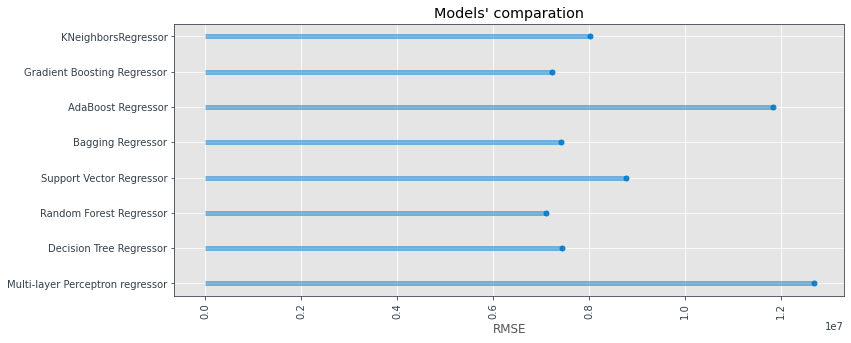

In [125]:
comparation_chart(models, RMSE)

# Model submission
==================================================================================================

In [41]:
X_pred = pd.DataFrame(pd.read_csv(ROOT_PATH + '/data/raw/test.csv'))
X_pred_sub = X_pred.drop([col for col in X_pred.columns if col in X_pred.columns and col not in df.columns], axis=1)
X_pred_sub.drop(columns='ID', inplace=True)
predictions = rfc.predict(X_pred_sub)
predictions = pd.DataFrame(predictions)
submission = pd.DataFrame(X_pred['ID'].copy())
submission['target'] = predictions[0].copy()

In [48]:
import urllib.request
from PIL import Image

sample = pd.read_csv(ROOT_PATH + '/data/raw/sample_submission.csv')

In [54]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.ID.all() == sample.ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [55]:
chequeator(submission)

You're ready to submit!


==================================================================================================
# Result

With approximately 91% of the test data, the final result, using a Random Forest model with depth of 12, is a score of __1.90569__ (RMSE).

==================================================================================================